In [0]:
#importing all necessary libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [0]:
#loading boston house pricing dataset

boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)


(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
#creating dataframe for the dataset

data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)

In [0]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [0]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20,random_state=42,
shuffle=True)

In [0]:
#Model: Decision Tree Regressor

dtc =  DecisionTreeRegressor(max_depth=5, random_state=0)
dtc.fit(x_training_set, y_training_set)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
#Decision Tree Regressor's Errors and Variance

model_score = dtc.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.:' ,model_score)
y_predicted = dtc.predict(x_test_set)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_set, y_predicted))
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_set, y_predicted)))

coefficient of determination R^2 of the prediction.: 0.9185171013474737
Mean Absolute Error: 2.606196032019045
Mean squared error: 20.36
Test Variance score: 0.72
Root Mean Squared Error: 4.511791166025231


In [0]:
# Model: Random Forest Regressor

x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.20,random_state=42,
shuffle=True)

rfc = RandomForestRegressor(max_depth=5, random_state=0)
rfc.fit(x_training_set,y_training_set)
# predictions
y_pred = rfc.predict(x_test_set)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Random Forest Regressor's Errors and Variance

model_score = rfc.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.:' ,model_score)
y_predicted = rfc.predict(x_test_set)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_set, y_predicted))
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_set, y_predicted)))

coefficient of determination R^2 of the prediction.: 0.9263154828659765
Mean Absolute Error: 2.2154207274115483
Mean squared error: 10.71
Test Variance score: 0.85
Root Mean Squared Error: 3.272561805256446


In [0]:
#Learning curve function

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='r2'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

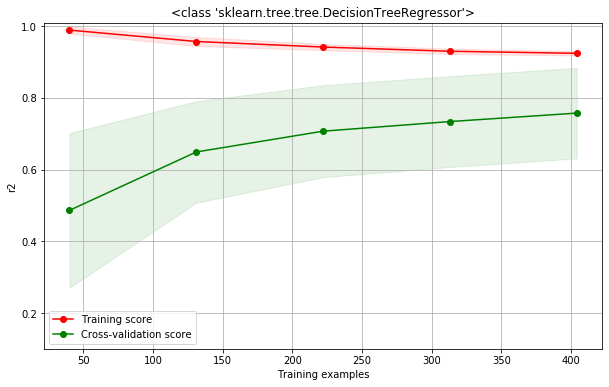

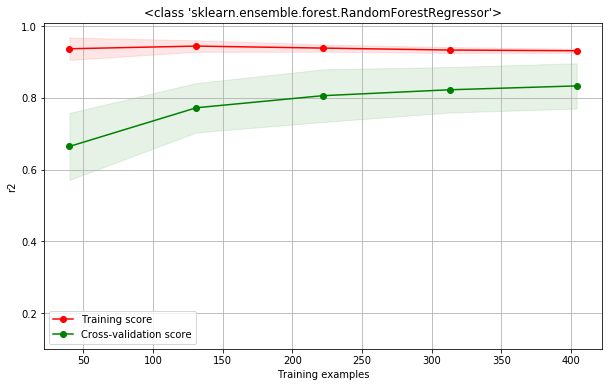

In [0]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

#rfc =  RandomForestRegressor(max_depth=5, random_state=0)
plot_learning_curve(dtc, DecisionTreeRegressor, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plot_learning_curve(rfc, RandomForestRegressor, X, y, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
No handles with labels found to put in legend.


min value: 0.0
max value: 17.721917521525185
difference in scale: inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

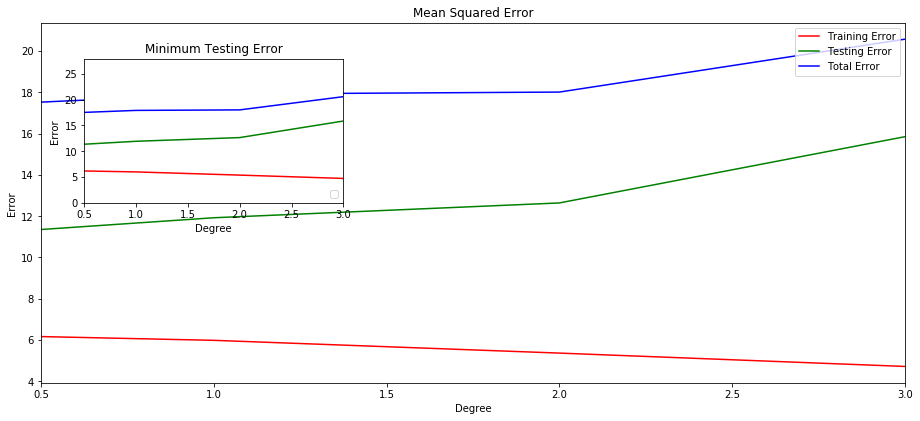

In [0]:
#Error Plot for Decision Tree Regressor

steps = np.arange(1,5,1)

trainErr = np.zeros(steps.shape)
testErr = np.zeros(steps.shape)

for i, step in enumerate(steps):
    # Generate polynomial features
    poly = PolynomialFeatures(step, interaction_only=True)
    pX_train = poly.fit_transform(x_training_set)
    pX_test = poly.transform(x_test_set)
    
    # Rescale the features with mean = 0, std = 1 for numerical stability
    scaler = StandardScaler()
    pX_train = scaler.fit_transform(pX_train)
    pX_test = scaler.transform(pX_test)
    
    # Create model instance
    model = RandomForestRegressor(max_depth=5, random_state=0)
    
    # Train model
    model.fit(pX_train, y_training_set)
    
    # Make Predictions
    y_train_pred = model.predict(pX_train)
    y_test_pred = model.predict(pX_test)
    
    # Calculate Error
    trainErr[i] = mean_squared_error(y_training_set, y_train_pred)
    testErr[i] = mean_squared_error(y_test_set, y_test_pred)


    fig = plt.figure(figsize=(12,5))

totalErr = trainErr + testErr

#test_loss_min = testErr.min()
#deg_min = testErr.argmin() + steps[0]

#plt.annotate('Minimum Test Loss (%.4f) w/ %.0f degrees' % (test_loss_min, deg_min),xy=(deg_min,test_loss_min),xytext=(deg_min,test_loss_min-50),arrowprops=dict(width=1,headwidth=2,facecolor='r',shrink=0.05))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.05, .5, .3, .4]) # inner axes

axes1.plot(trainErr,'r',label='Training Error')
axes1.plot(testErr,'g',label='Testing Error')
axes1.plot(totalErr, 'b', label='Total Error')

axes1.set_title("Mean Squared Error")
axes1.set_xlabel("Degree")
axes1.set_ylabel("Error")
axes1.set_xlim(0.5,steps[-2])
axes1.legend(loc=1)

axes2.plot(trainErr,'r')
axes2.plot(testErr,'g')
axes2.plot(totalErr,'b')
axes2.set_xlim(0.5,steps[-2])
axes2.set_ylim(0, totalErr[1]+10)
axes2.set_title("Minimum Testing Error")
axes2.set_xlabel("Degree")
axes2.set_ylabel("Error")

plt.legend(loc=4)
print ('min value:', np.abs(pX_train).min())
print ('max value:', np.abs(pX_train).max())
print ('difference in scale:', np.abs(pX_train).max() / np.abs(pX_train).min())

No handles with labels found to put in legend.


min value: 0.0
max value: 17.721917521525185
difference in scale: inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in double_scalars


<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

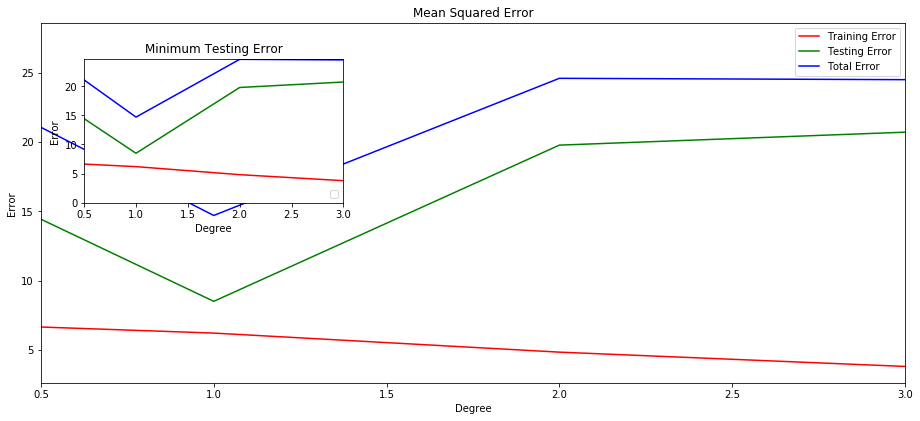

In [0]:
#Error Plot for Random Forest Regressor Model

steps = np.arange(1,5,1)

trainErr = np.zeros(steps.shape)
testErr = np.zeros(steps.shape)

for i, step in enumerate(steps):
    # Generate polynomial features
    poly = PolynomialFeatures(step, interaction_only=True)
    pX_train = poly.fit_transform(x_training_set)
    pX_test = poly.transform(x_test_set)
    
    # Rescale the features with mean = 0, std = 1 for numerical stability
    scaler = StandardScaler()
    pX_train = scaler.fit_transform(pX_train)
    pX_test = scaler.transform(pX_test)
    
    # Create model instance
    model = DecisionTreeRegressor(max_depth=5,random_state=0)
    
    # Train model
    model.fit(pX_train, y_training_set)
    
    # Make Predictions
    y_train_pred = model.predict(pX_train)
    y_test_pred = model.predict(pX_test)
    
    # Calculate Error
    trainErr[i] = mean_squared_error(y_training_set, y_train_pred)
    testErr[i] = mean_squared_error(y_test_set, y_test_pred)

    fig = plt.figure(figsize=(12,5))

totalErr = trainErr + testErr

#test_loss_min = testErr.min()
#deg_min = testErr.argmin() + steps[0]

#plt.annotate('Minimum Test Loss (%.4f) w/ %.0f degrees' % (test_loss_min, deg_min),xy=(deg_min,test_loss_min),xytext=(deg_min,test_loss_min-50),arrowprops=dict(width=1,headwidth=2,facecolor='r',shrink=0.05))

axes1 = fig.add_axes([0, 0, 1, 1]) # main axes
axes2 = fig.add_axes([0.05, .5, .3, .4]) # inner axes

axes1.plot(trainErr,'r',label='Training Error')
axes1.plot(testErr,'g',label='Testing Error')
axes1.plot(totalErr, 'b', label='Total Error')

axes1.set_title("Mean Squared Error")
axes1.set_xlabel("Degree")
axes1.set_ylabel("Error")
axes1.set_xlim(0.5,steps[-2])
axes1.legend(loc=1)

axes2.plot(trainErr,'r')
axes2.plot(testErr,'g')
axes2.plot(totalErr,'b')
axes2.set_xlim(0.5,steps[-2])
axes2.set_ylim(0, totalErr[1]+10)
axes2.set_title("Minimum Testing Error")
axes2.set_xlabel("Degree")
axes2.set_ylabel("Error")

plt.legend(loc=4)

print ('min value:', np.abs(pX_train).min())
print ('max value:', np.abs(pX_train).max())
print ('difference in scale:', np.abs(pX_train).max() / np.abs(pX_train).min())

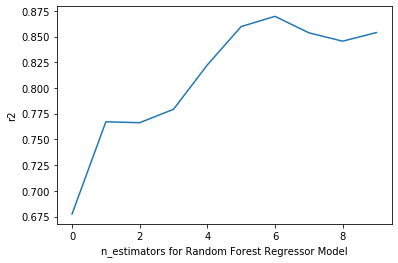

In [0]:
# plot showing incresing R² as n_estimators is increased from 1 to 9 for Random Forest Regressor Model.
preds = np.stack([t.predict(x_test_set) for t in rfc.estimators_])
preds[:,0], np.mean(preds[:,0])
plt.ylabel("r2")
plt.xlabel("n_estimators for Random Forest Regressor Model")
plt.plot([metrics.r2_score(y_test_set, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

Decision Tree Regressor Bias and Variance

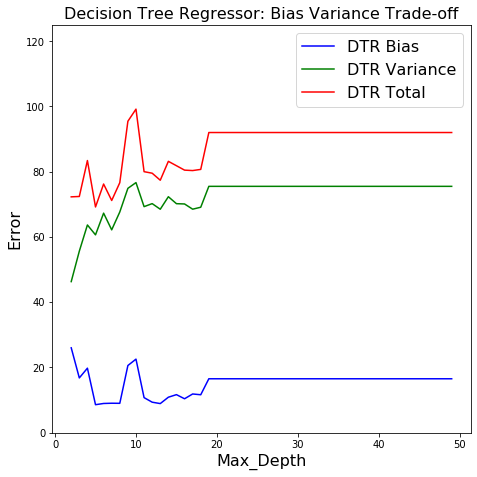

In [0]:
# Bias and Variance functions

def bias(y_predict,y):
    y_predict = np.array(y_predict)
    return np.average(np.power((y_predict-y),2))

def variance(y_predict):
    y_predict = np.array(y_predict)
    return np.var(y_predict)

# Parameters for bias and variance
max_depth_DTR = np.arange(2,50)
accuracy_DTR_score_list = []
bias_DTR_list = []
var_DTR_list = []
total_DTR_list = []
err_DTR_list_test = []
err_DTR_list_training = []
err_tot_DTR_list = []

model_DTR = DecisionTreeRegressor(random_state=42)

for entry in max_depth_DTR:

    # model fit and predict
    model_DTR.set_params(max_depth=entry)
    model_DTR.fit(x_training_set, y_training_set)
    predicted_y_DTR_test = model_DTR.predict(x_test_set)
    predicted_y_DTR_train = model_DTR.predict(x_training_set)

    # bias and variance estimate
    bias_variable = bias(predicted_y_DTR_test, y_test_set)
    variance_variable = variance(predicted_y_DTR_test)
    bias_DTR_list.append(bias_variable)
    var_DTR_list.append(variance_variable)
    total_DTR = bias_variable + variance_variable
    total_DTR_list.append(total_DTR)

    # training and test estimate
    err_DT_test_variable =mean_squared_error(y_test_set,predicted_y_DTR_test)
    err_DT_training_variable = mean_squared_error(y_training_set, predicted_y_DTR_train)
    err_DT_tot_variable = err_DT_test_variable + err_DT_training_variable
    err_DTR_list_test.append(err_DT_test_variable)
    err_DTR_list_training.append(err_DT_training_variable)
    err_tot_DTR_list.append(err_DT_tot_variable)

    # Plot bias vs variance from changing the depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_DTR, bias_DTR_list,color = 'b')
plt.plot(max_depth_DTR, var_DTR_list,color = 'g')
plt.plot(max_depth_DTR, total_DTR_list,color = 'r')
plt.legend(['DTR Bias', 'DTR Variance', 'DTR Total'], loc='upper right',fontsize = 16)
plt.title('Decision Tree Regressor: Bias Variance Trade-off',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(0,125)
plt.show()

Random Forest Regressor Bias and Variance

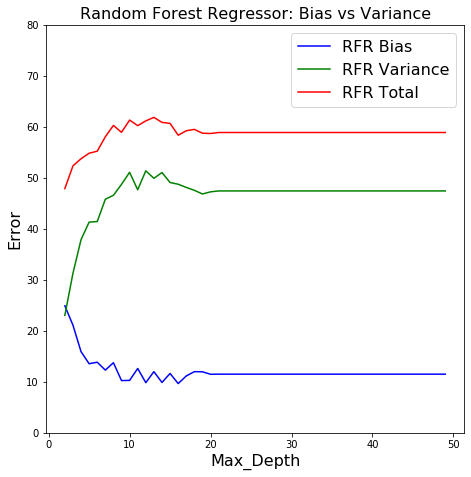

In [0]:
# Parameters for Bias and Variance
max_depth_RFR = np.arange(2,50)
bias_RFR_depth_list = []
var_RFR_depth_list = []
total_RFR_depth_list = []
err_RFR_list_test = []
err_RFR_list_training = []
err_tot_RFR_list = []

model_RFR = RandomForestRegressor(random_state=42,oob_score=True)
model_RFR.set_params(max_depth= 20, 
                        max_features= 'sqrt',  
                        n_estimators=20, 
                        oob_score = True,
                        criterion = 'mse')

for entry in max_depth_RF_regression:
   
    #model fit and predict
    model_RFR.set_params(max_depth=entry)
    model_RFR.fit(x_training_set,  np.ravel(y_training_set))
    predicted_y_RFR_test = model_RFR.predict(x_test_set)
    predicted_y_RFR_train = model_RF_regressor.predict(x_training_set)
    bias_variable = bias(predicted_y_RFR_test, y_test_set)
    variance_variable = variance(predicted_y_RFR_test)
    bias_RFR_depth_list.append(bias_variable)
    var_RFR_depth_list.append(variance_variable)
    total_RFR = bias_variable + variance_variable
    total_RFR_depth_list.append(total_RFR)
   
    # training and test estimate
    err_RF_test_variable =mean_squared_error(y_test_set,predicted_y_RFR_test)
    err_RF_training_variable = mean_squared_error(y_training_set, predicted_y_RFR_train)
    err_RF_tot_variable = err_RF_test_variable + err_RF_training_variable
    err_RFR_list_test.append(err_RF_test_variable)
    err_RFR_list_training.append(err_RF_training_variable)
    err_tot_RFR_list.append(err_RF_tot_variable)

    # Plot bias vs variance from changing the depth of the tree
plt.figure(figsize=(7.5,7.5))
plt.plot(max_depth_RFR, bias_RFR_depth_list,color = 'b')
plt.plot(max_depth_RFR, var_RFR_depth_list,color = 'g')
plt.plot(max_depth_RFR, total_RFR_depth_list,color = 'r')
plt.legend(['RFR Bias', 'RFR Variance', 'RFR Total'], loc='upper right',fontsize = 16)
plt.title('Random Forest Regressor: Bias vs Variance',fontsize = 16)
plt.ylabel('Error',fontsize = 16)
plt.xlabel('Max_Depth',fontsize = 16)
plt.ylim(0,80)
plt.show()